In [15]:
import pandas as pd 
import numpy as np 
from pandas import datetime
import matplotlib.pyplot as plt

import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

def date_parser(x):
    return datetime.strptime(x, '%Y-%m')

sales = pd.read_csv("./shampoo-sales/sales.csv", header=[0], parse_dates=[0], date_parser=date_parser, index_col=0)

sales.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  # This is added back by InteractiveShellApp.init_path()


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

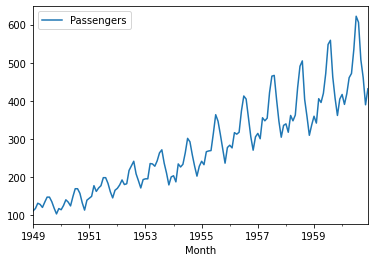

In [16]:
sales.plot()

In [27]:
sales["diff"] = sales.Passengers.diff()
sales["diff"][0] = 0
sales.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Passengers,diff
Month,,
1949-01-01,112,0.0
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [39]:
train_size = int(len(sales) * .67)
test_size = len(sales) - train_size
print(train_size, test_size)
train, test = sales[:train_size], sales[train_size:]
train = np.array(train)
test = np.array(test)
print(train.shape, test.shape, train[:10])

96 48
(96, 2) (48, 2) [[112.   0.]
 [118.   6.]
 [132.  14.]
 [129.  -3.]
 [121.  -8.]
 [135.  14.]
 [148.  13.]
 [148.   0.]
 [136. -12.]
 [119. -17.]]


In [66]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back),]
		dataX.append(a)
		dataY.append(dataset[i + look_back,])
	return np.array(dataX), np.array(dataY)

look_back = 8
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 2, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 2, testX.shape[1]))
trainY = trainY[:,0]
testY = testY[:,0]
print(trainY)
print(trainX.shape, trainY.shape)

[136. 119. 104. 118. 115. 126. 141. 135. 125. 149. 170. 170. 158. 133.
 114. 140. 145. 150. 178. 163. 172. 178. 199. 199. 184. 162. 146. 166.
 171. 180. 193. 181. 183. 218. 230. 242. 209. 191. 172. 194. 196. 196.
 236. 235. 229. 243. 264. 272. 237. 211. 180. 201. 204. 188. 235. 227.
 234. 264. 302. 293. 259. 229. 203. 229. 242. 233. 267. 269. 270. 315.
 364. 347. 312. 274. 237. 278. 284. 277. 317. 313. 318. 374. 413. 405.
 355. 306. 271.]
(87, 2, 8) (87,)


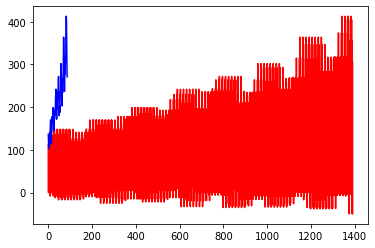

In [62]:
plt.plot(trainX.flatten(),  "r")
plt.plot(trainY, "b")
plt.show()

In [63]:
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Input, Dropout
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Input(shape=(1, look_back)))
model.add(
    Bidirectional(LSTM(256, activation='relu', return_sequences=True))
)
model.add(
    Bidirectional(LSTM(128, activation='relu'))
)
model.add(
    Bidirectional(LSTM(128, activation='relu'))
)
model.add(Dropout(.1))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(1))
model.summary()



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_11 (Bidirectio (None, 1, 512)            542720    
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 256)               656384    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 33        
Total params: 1,217,665
Trainable params: 1,217,665
Non-trainable params: 0
____________________________________________

In [64]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, batch_size=1, epochs=100)

Epoch 1/100
87/87 [==============================] - 1s 6ms/step - loss: 4337.3315
Epoch 2/100
87/87 [==============================] - 1s 6ms/step - loss: 1355.6062
Epoch 3/100
87/87 [==============================] - 1s 6ms/step - loss: 1471.5366
Epoch 4/100
87/87 [==============================] - 1s 6ms/step - loss: 1657.0474
Epoch 5/100
87/87 [==============================] - 0s 6ms/step - loss: 939.5150
Epoch 6/100
87/87 [==============================] - 0s 6ms/step - loss: 801.8475
Epoch 7/100
87/87 [==============================] - 0s 6ms/step - loss: 1271.6514
Epoch 8/100
87/87 [==============================] - 0s 6ms/step - loss: 1114.9227
Epoch 9/100
87/87 [==============================] - 0s 5ms/step - loss: 797.4304
Epoch 10/100
87/87 [==============================] - 0s 5ms/step - loss: 458.8228
Epoch 11/100
87/87 [==============================] - 0s 5ms/step - loss: 1235.2391
Epoch 12/100
87/87 [==============================] - 0s 5ms/step - loss: 1489.0034
Epoch

13015.035385578607


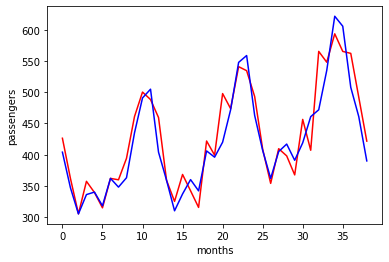

In [68]:
pred = model.predict(testX)
print(np.square(testY-pred).mean())
plt.plot(pred, "r")
plt.plot(testY, "b")
plt.xlabel("months")
plt.ylabel("passengers")
plt.show()

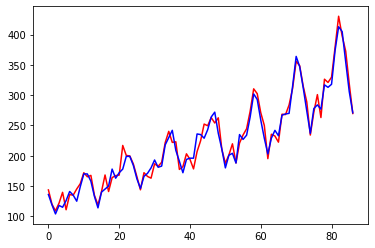

In [69]:
pred_train = model.predict(trainX)
plt.plot(pred_train, "r")
plt.plot(trainY, "b")
plt.show()